In [ ]:
!pip install requests

In [ ]:
!pip install --upgrade --no-cache-dir pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 220.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install folium

In [ ]:
!pip install requests
!pip install --upgrade --no-cache-dir pandas
!pip install folium

maschi:  2328 femmine:  249 altro:  37
fondatori:  2614 nonFondatori:  0


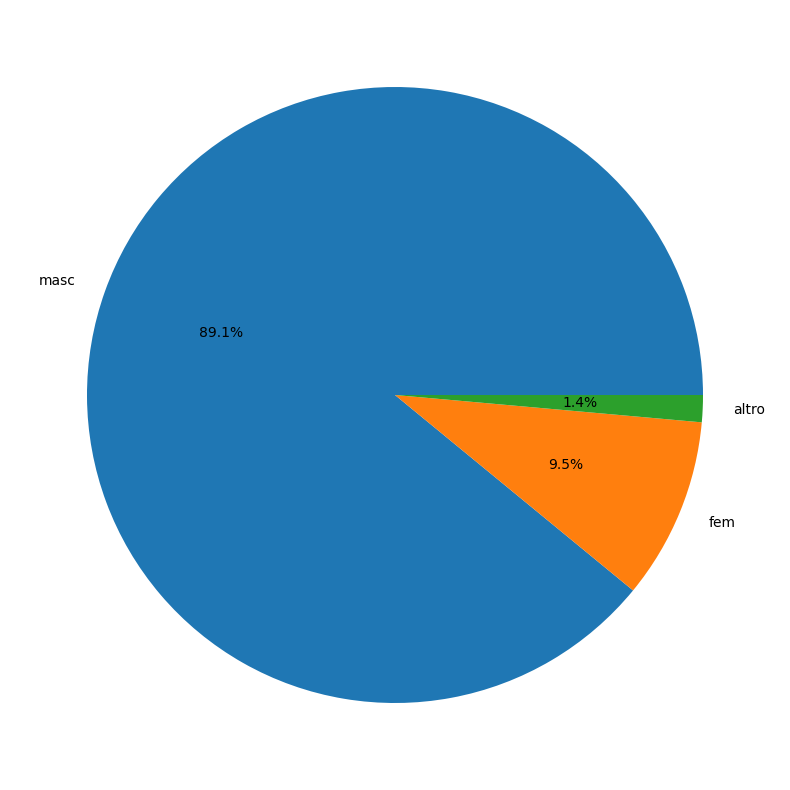

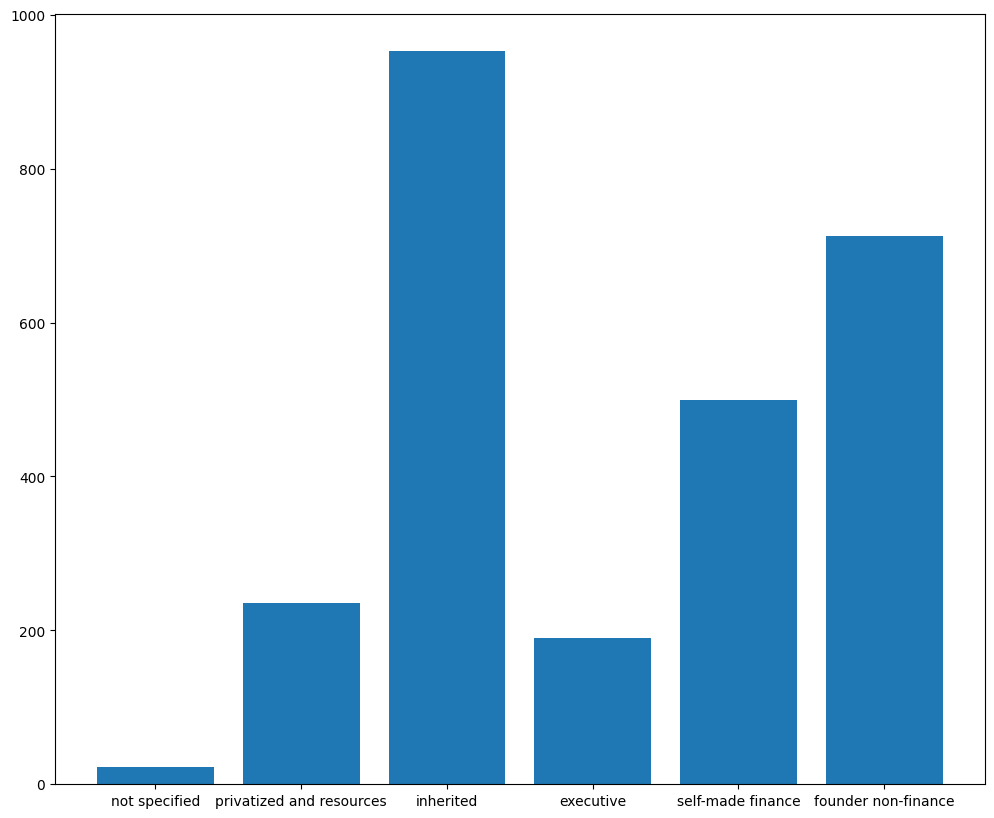

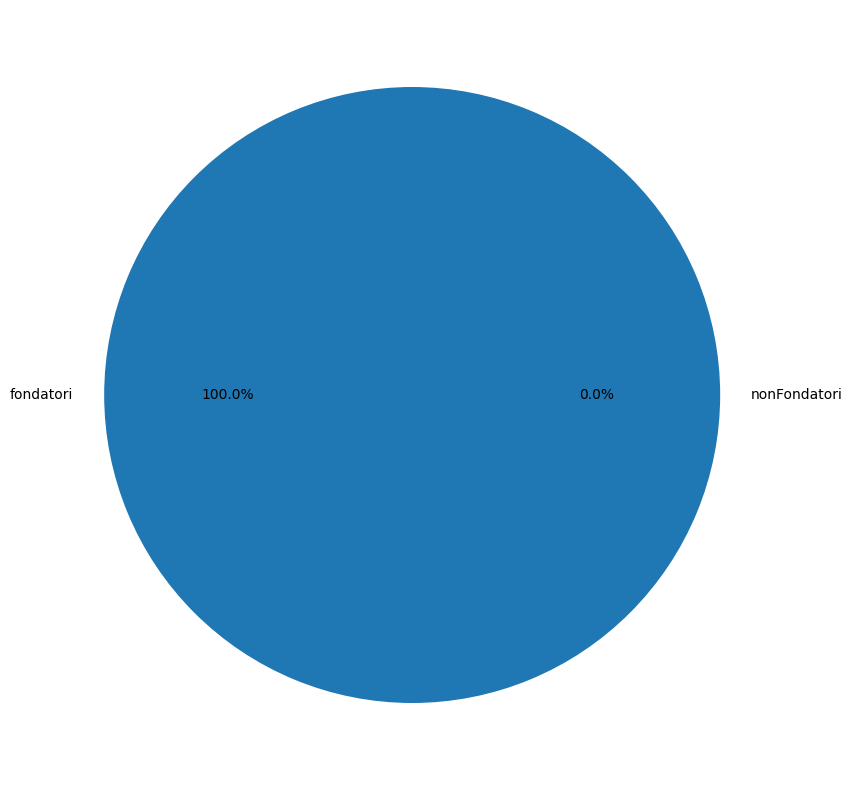

In [ ]:
import requests
import pandas as pd
import folium
import matplotlib.pyplot as plt
import json


data = requests.get("https://raw.githubusercontent.com/RealTimeWeb/datasets/refs/heads/master/datasets/json/billionaires/billionaires.json").json()

attive = list()
dc = dict()

masc = 0
fem = 0
altro = 0

stati = set()
for d in data:
      s = d['demographics']["gender"]
      if s =="male":
        masc+=1
      elif s=="female":
        fem+=1
      else:
        altro+=1

print(
    "maschi: ",masc,
    "femmine: ",fem,
    "altro: ",altro
)

fondatori=0
nonFondatori=0

for x in data:
      s = x['wealth']["how"]["was founder"]
      if s:
        fondatori+=1
      else:
        nonFondatori+=1

print(
    "fondatori: ",fondatori,
    "nonFondatori: ",nonFondatori
)

par=0
ine=0
nie=0
ex=0
smf=0
fnf=0

tipo = set()
for x in data:
      s = x['wealth']["type"]
      tipo.add(s)
      if s=="privatized and resources":
        par+=1
      elif s=="inherited":
        ine+=1
      elif s=="founder non-finance":
        fnf+=1
      elif s=="executive":
        ex+=1
      elif s=="self-made finance":
        smf+=1
      else:
        nie+=1

"""print(
    "not specified: ",nie,
    "privatized and resources: ",par,
    "inherited: ",ine,
    "executive: ",ex,
    "self-made finance: ",smf,
    "founder non-finance: ",fnf

)"""
temp = [masc,fem,altro]
plt.figure(figsize=(10,10))
plt.pie(temp,labels=['masc','fem','altro'],autopct='%1.1f%%')
plt.show()

temp = [nie,par,ine,ex,smf,fnf]
plt.figure(figsize=(12,10))
plt.bar(['not specified','privatized and resources','inherited','executive','self-made finance','founder non-finance'],temp,align='center')
plt.show()

temp = [fondatori,nonFondatori]
plt.figure(figsize=(10,10))
plt.pie(temp,labels=['fondatori','nonFondatori'],autopct='%1.1f%%')
plt.show()





In [16]:
stati = dict()
for d in data:
      s = d['location']["citizenship"]
      if s == "United States":
        s = "United States of America"
      if s not in stati:
        stati[s]=1
      else:
        stati[s]+=1

geojson_data = requests.get("https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json").json()

print(stati)

m = folium.Map([43, -100], zoom_start=4)

folium.Choropleth(
    geo_data = geojson_data,
    data = stati,
    #columns = stati[, ],
    key_on = "properties.name",
    fill_color = "GnBu",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Miliardari"
).add_to(m)

m


{'Saudi Arabia': 22, 'United States of America': 903, 'Brazil': 81, 'Germany': 160, 'Hong Kong': 77, 'Bahrain': 1, 'Japan': 96, 'France': 72, 'Mexico': 44, 'Netherlands': 12, 'Spain': 37, 'Ecuador': 1, 'Peru': 9, 'Chile': 19, 'Malaysia': 28, 'Philippines': 22, 'South Africa': 12, 'Turkey': 32, 'Thailand': 23, 'Switzerland': 51, 'Argentina': 12, 'Colombia': 8, 'Taiwan': 40, 'Canada': 53, 'South Korea': 36, 'Indonesia': 31, 'United Kingdom': 65, 'India': 63, 'Lebanon': 9, 'Italy': 58, 'Greece': 11, 'Venezuela': 7, 'Sweden': 27, 'Kuwait': 7, 'Ireland': 8, 'Australia': 33, 'Singapore': 26, 'Denmark': 10, 'Liechtenstein': 2, 'Israel': 26, 'United Arab Emirates': 5, 'Belgium': 4, 'Portugal': 5, 'Bermuda': 1, 'Norway': 11, 'New Zealand': 3, 'Russia': 119, 'Egypt': 9, 'China': 153, 'Nigeria': 4, 'Kazakhstan': 5, 'Morocco': 4, 'Czech Republic': 6, 'Finland': 4, 'Georgia': 1, 'Nepal': 1, 'Poland': 5, 'Macau': 2, 'Monaco': 3, 'Austria': 10, 'Ukraine': 9, 'Romania': 1, 'Angola': 1, 'Algeria': 1, '

In [ ]:
while True:
  print("Immettere uno stato(se non esiste o non ha Miliardari esce dal ciclo): ")
  inp = input()
  if inp in stati:
    print(stati[inp])
  else:
    break

Immettere uno stato(se non esiste o non ha Miliardari esce dal ciclo): 
Italy
58
Immettere uno stato(se non esiste o non ha Miliardari esce dal ciclo): 
